# BANK MARKETING:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In [1]:
# For basic mathematics operation 
import numpy as np
import pandas as pd

# For Machine Learning aLgorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
 
# For visualizations
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate accuracy measures and confusion metric
from sklearn import metrics

In [2]:
data=pd.read_csv('C:\\Users\\Vibhor Tyagi\\Desktop\\Data Science\\bank-full.csv')
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
cat = data.select_dtypes(include=['object'])
num = data.select_dtypes(include=['int64'])

# For understanding the count of "unknown" elements in an attribute. Checking if their numbers are significant enough 
# to affect our analysis.
for i in cat:
    x=cat[i].value_counts()
    if "unknown" in x:
        print(x, end='\n')
        print("\n")    


        # Here, we realise that "poutcome" and "contact" are bad features with high quantity of "unknown" element.So we'll drop them.

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64




In [7]:
# Counting number of '-1' in 'pdays' in numerical: 
count=0
for i in num['pdays']:
    if i==-1:
        count=count+1
print(count)

# Clearly, we need to drop this column! :) 

36954


In [8]:
cat=cat.drop(columns='contact')
cat=cat.drop(columns='poutcome')

In [9]:
# In case of numerical attributes we have seen there aren't any null values hence it doesn't have any equivalent "unknown"
# values.
num=num.drop(columns='pdays')
num.head()

,age,balance,day,duration,campaign,previous
0,58,2143,5,261,1,0
1,44,29,5,151,1,0
2,33,2,5,76,1,0
3,47,1506,5,92,1,0
4,33,1,5,198,1,0


In [10]:
# for encoding we find features, worth encoding:
# we take cat values with less than 5 unique values
# Other categorical values we do seperate analysis with our output
cat.nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
month        12
y             2
dtype: int64

In [11]:
cat1=pd.get_dummies(data=cat, columns=['marital', 'education','default','housing','loan','y'])
cat1=cat1.drop(columns='job')
cat1=cat1.drop(columns='month')
cat1.head(5)

,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,y_no,y_yes
0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0
2,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0
3,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0
4,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0


In [12]:
# Removing useless features:
cat1=cat1.drop(columns='default_no')
cat1=cat1.drop(columns='y_no')
cat1=cat1.drop(columns='housing_no')
cat1=cat1.drop(columns='loan_no')
cat1=cat1.drop(columns='education_unknown')
cat1.head(5)

,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes,y_yes
0,0,1,0,0,0,1,0,1,0,0
1,0,0,1,0,1,0,0,1,0,0
2,0,1,0,0,1,0,0,1,1,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0


In [13]:
#label encoding them
# Treating Left out cat attributes:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
cat['job']= label_encoder.fit_transform(cat['job']) 
cat['month']= label_encoder.fit_transform(cat['month'])
cat=cat.join(cat1['y_yes'])
cat.head(5)

,job,marital,education,default,housing,loan,month,y,y_yes
0,4,married,tertiary,no,yes,no,8,no,0
1,9,single,secondary,no,yes,no,8,no,0
2,2,married,secondary,no,yes,yes,8,no,0
3,1,married,unknown,no,yes,no,8,no,0
4,11,single,unknown,no,no,no,8,no,0


# DATA VISUALIZATION

### Data Visualization : Categorical Features

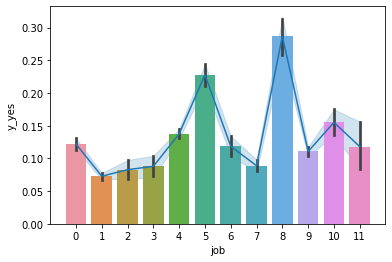

In [14]:
#from numpy import median. In case onne wants estimator to be median.
sns.barplot(x=(cat['job']),y=cat['y_yes'])
sns.lineplot(x=cat['job'],y=cat['y_yes'])


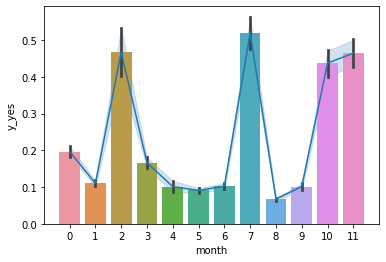

In [15]:
sns.barplot(x=cat['month'],y=cat1['y_yes'])
sns.lineplot(x=cat['month'],y=cat1['y_yes'])


In [16]:
# THE ISSUE THAT ARISES HERE IS THAT THESE TWO COLUMNS, NAMELY 'JOBS' AND 'MONTHS' HAVE 12 UNIQUEE CATEGORICAL VALUES. 
# HENCE,WE CAN'T USE GET DUMMIES OR ONE HOT ENCODER. IF WE WISH TO USE THESE TWO ATTRIBUTES THE ONLY OPTION WE ARE LEFT
# WITH IS TO USE LABEL ENCODER. BUT IT COMES WITH IT'S USUAL PROBLEM OF "ORDER". 
# THE ALGORITHM MIGHT MISUNDERSTAND THE CATEGORICAL VALUES AS ORDINAL VALUES.
# HOWEVER I'VE CHOSEN TO USE THESE ATTRIBUTES HERE INSTEAD OF DROPPING THEM 
# BASED ON SOME TESTS I'VE DONE ON THESE 2 ATTRIBUTES THAT I HAVEN'T INCLUDED HERE. 

###  Data Visualization : Numerical Features

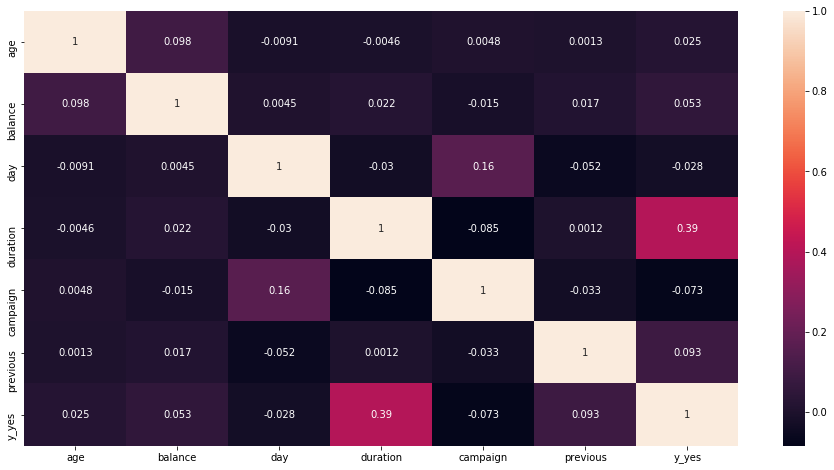

In [17]:
num=num.join(cat1['y_yes'])
plt.figure(figsize=(16,8))
sns.heatmap(num.corr(),annot = True)

In [18]:
# THE ONLY GOOD ATTRIBUTE HERE IS "DURATION". HOWEVER I'LL BE MAKING A MODEL, USING ALL THE ATTRIBUTES, 
#  THEN I'LL BE USING ONLY 'DURATION' FOR MY SECOND MODEL.

C:\Users\Vibhor Tyagi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Vibhor Tyagi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


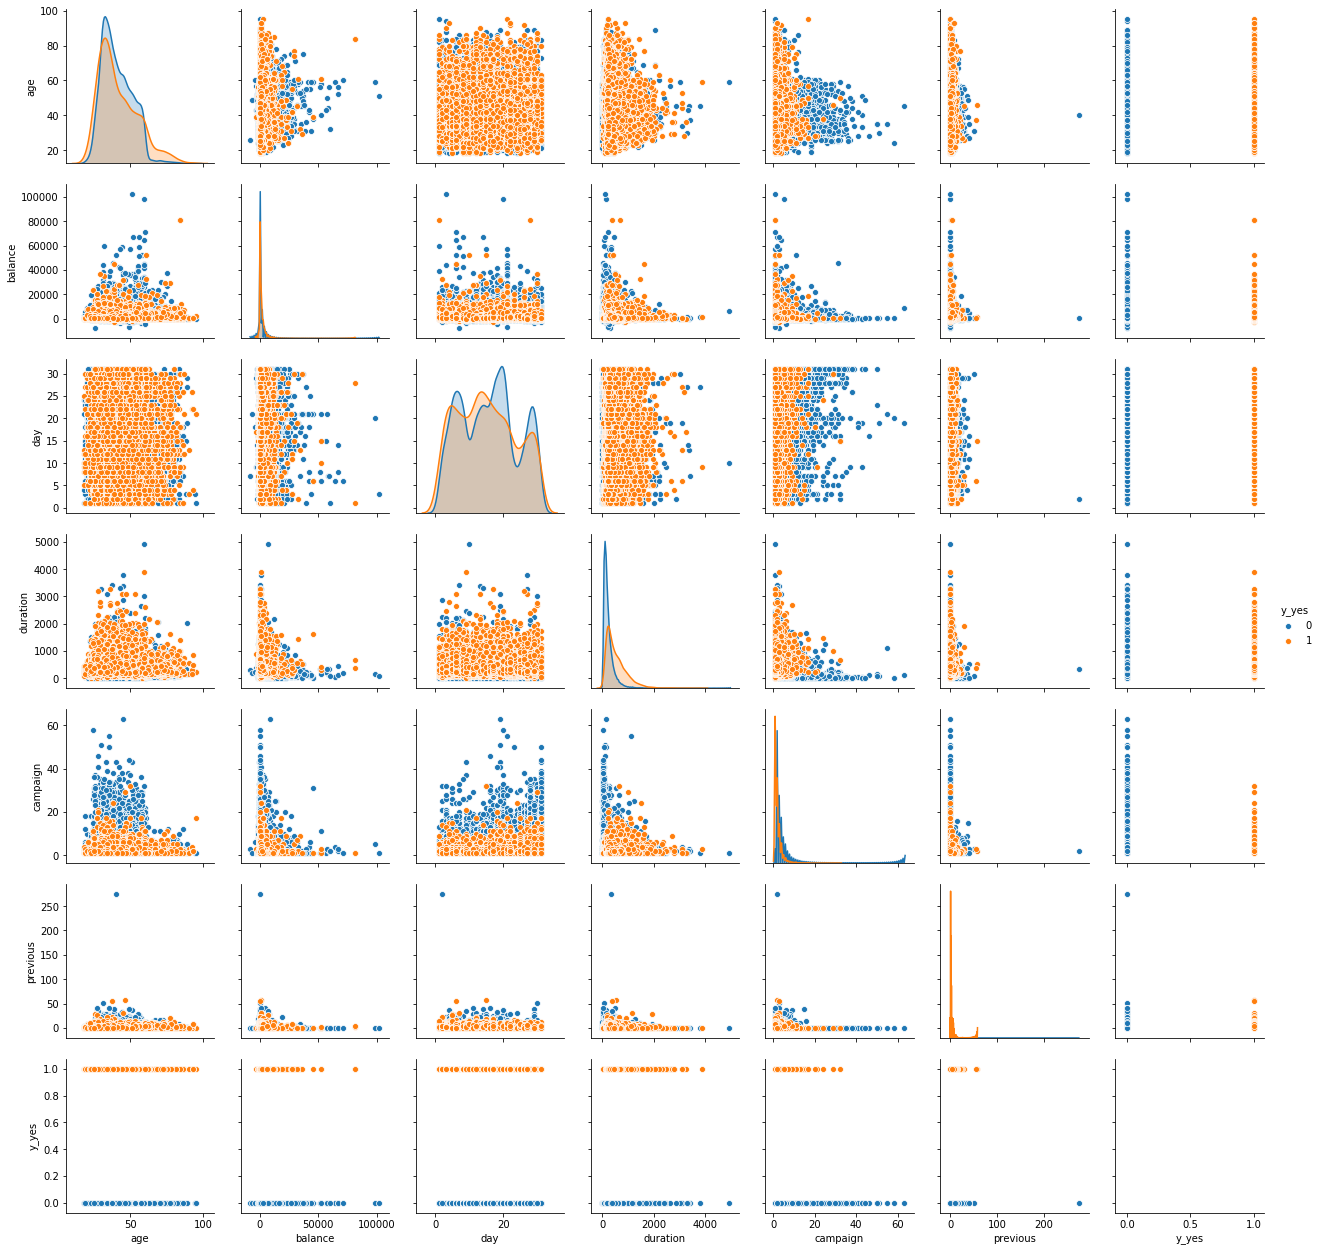

In [19]:
sns.pairplot(num,diag_kind='kde',hue='y_yes')

# FITTING DATA INTO MODELS


### LOGISTIC REGRESSION:

### 1st Attempt: Using all the attributes:

In [30]:
data=num
data=data.join(cat['job'])
data=data.join(cat['month'])
data=data.drop(columns='y_yes')
data=data.join(cat1)

data1=data
data2=data
data.head(5)

,age,balance,day,duration,campaign,previous,job,month,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes,y_yes
0,58,2143,5,261,1,0,4,8,0,1,0,0,0,1,0,1,0,0
1,44,29,5,151,1,0,9,8,0,0,1,0,1,0,0,1,0,0
2,33,2,5,76,1,0,2,8,0,1,0,0,1,0,0,1,1,0
3,47,1506,5,92,1,0,1,8,0,1,0,0,0,0,0,1,0,0
4,33,1,5,198,1,0,11,8,0,0,1,0,0,0,0,0,0,0


In [31]:
array=data.values
x = array[:,0:17]
y = array[:,17]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=40)
model = LogisticRegression()
model.fit(x_train, y_train)
y_predict1=model.predict(x_test)

print("Logistic Regression model accuracy(in %):", metrics.accuracy_score(y_test, y_predict1)*100)
print(metrics.confusion_matrix(y_test,y_predict1))

C:\Users\Vibhor Tyagi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression model accuracy(in %): 89.01913081941834
[[7824  152]
 [ 841  226]]


### 2nd Attempt: Using only good indicators:

In [32]:
data=data.drop(columns='age')
data=data.drop(columns='balance')
data=data.drop(columns='day')
data=data.drop(columns='previous')
data=data.drop(columns='campaign')

In [33]:
data.head()

,duration,job,month,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes,y_yes
0,261,4,8,0,1,0,0,0,1,0,1,0,0
1,151,9,8,0,0,1,0,1,0,0,1,0,0
2,76,2,8,0,1,0,0,1,0,0,1,1,0
3,92,1,8,0,1,0,0,0,0,0,1,0,0
4,198,11,8,0,0,1,0,0,0,0,0,0,0


In [34]:
array=data.values
p = array[:,0:12]
q = array[:,12]
x_train,x_test,y_train,y_test = train_test_split(p,q,test_size = 0.20,random_state=40)
model = LogisticRegression()
model.fit(x_train, y_train)
y_predict2=model.predict(x_test)

print("Logistic Regression model accuracy(in %):", metrics.accuracy_score(y_test, y_predict2)*100)
print(metrics.confusion_matrix(y_test,y_predict2))

C:\Users\Vibhor Tyagi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression model accuracy(in %): 88.87537321685282
[[7837  139]
 [ 867  200]]


### NAIVE BAYES:

In [35]:
array=data1.values
x = array[:,0:17]
y = array[:,17]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=40)
from sklearn.naive_bayes import GaussianNB 

gnb = GaussianNB() 
gnb.fit(x_train, y_train) 

# making predictions on the testing set 
y_predict3 = gnb.predict(x_test) 

In [36]:
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_predict3)*100)
print(metrics.confusion_matrix(y_test,y_predict3))

Gaussian Naive Bayes model accuracy(in %): 87.67002101072653
[[7536  440]
 [ 675  392]]
